In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch
import pylab as pl
import numpy as np


In [2]:
pd.set_option('display.max_rows', 1000)


In [3]:
# Shapefile with the streets named after victims
missing_killed = gpd.read_file('missing_kiled_map_shp/')

In [4]:
# Shapefile with the streets named after criminals
dictatorship_criminals = gpd.read_file('dictatorship_criminals_map_shp/')

In [5]:
# Copying dataframes to make buffers
missing_killed_buffered = missing_killed.copy()
dictatorship_criminals_buffered = dictatorship_criminals.copy()

In [6]:
# Selecting a few columns
missing_killed = missing_killed[['geometry','name']]

In [7]:
# Selecting a few columns
dictatorship_criminals = dictatorship_criminals[['geometry','name']]

In [8]:
# Setting code
missing_killed['code'] = '1'

In [9]:
# Setting color
missing_killed['color'] = '#FF0000'

In [10]:
# Setting code
dictatorship_criminals['code'] = '2'

In [11]:
# Setting color
dictatorship_criminals['color'] = '#008000'

In [12]:
# Concatenating dataframes
merged_df = pd.concat([missing_killed,dictatorship_criminals]).reset_index()

In [13]:
# Function to get a description based on the street name
def get_desc(row):
    #### VICTIMS
    if "luiz vieira" in row['name']:
        desc = 'TO DO'
    if "josé de oliveira" in row['name']:
        desc = 'Camponês desaparecido durante a Guerrilha do Araguaia, em 1972. Não há mais informações sobre sua biografia.'
        # keep?
    if "josé de souza" in row['name']:
        desc = 'Mecânico e sindicalista, morreu aos 33 anos, em 17 de abril de 1964. Supostamente, cometeu suicídio atirando-se do terceiro andar do prédio onde estava detido.'
        #keep?
    if 'josé guimarães' in row['name']:
        desc = 'Estudante paulistano. Aos 20 anos, foi morto a tiros no episódio que ficou conhecido como  "Batalha da Maria Antônia", quando forças policias reprimiram uma manifestação de estudantes no centro de São Paulo, em 3 de outubro de 1968.'
    if 'manoel alves de oliveira' in row['name']:
        desc = 'Segundo-sargento do Exército, morreu em 8 de maio de 1964 após ser torturado na Escola de Cavalaria do Rio de Janeiro. Tinha 30 anos e cinco filhos.'
    if 'arildo valadão' in row['name']:
        desc = 'Estudante de física e militante do PCdoB, lutou na Guerrilha do Araguaia. Em 24 de novembro de 1973, companheiros ouviram tiros e encontraram seu corpo sem a cabeça. Tinha 24 anos.'
    if 'benedito gonçalves' in row['name']:
        desc = 'Metalúrgico mineiro, foi feriado pela Polícia Militar durante um piquete grevista em 13 de agosto de 1979.  Morreu uma semana depois, no dia de seu aniversário de 48 anos.'
    if 'josé manoel da silva' in row['name']:
        desc = 'Ex-militar, morreu aos 22 anos, no dia 9 de janeiro de 1973. Havia sido expulso do exérito ao participar de manifestações contra o Golpe, em 1964, e ingressou no grupo de guerrilha urbana Vanguarda Popular Revolucionária. Foi morto em uma emboscada.'
    if 'margarida maria alves' in row['name']:
        desc = 'Camponesa, rendeira e sindicalista. Estudou apenas até a quarta série e trabalhava desde os 8 anos. Em 12 de agosto de 1983, foi executada com um tiro no rosto, em frente ao marido e aos filhos. Tinha 51 anos.'
    if 'carlos lamarca' in row['name']:
        desc = 'TO DO'
    if 'vladimir herzog' in row['name']:
        desc = 'TO DO'
    if 'josé porfírio de souza' in row['name']:
        desc = 'Líder camponês, membro da Vanguarda Armada Revolucionária Palmares. Morreu aos 57 anos, em 19 de março de 1970. Depois de sofrer torturas, foi forçado a ingerir veneno e abandonado em uma praça.'
    if 'maurício grabois' in row['name']:
        desc = 'Ex-dirigente do PCB, filiado ao PCdoB. Participava de guerrilha no interior do Pará quando desapareceu, no Natal de 1973, aos 61 anos.'
    if 'márcio beck machado' in row['name']:
        desc = 'Universitário, estudava economia na Universidade Mackenzie, em São Paulo. Participou de treinamento militar em Cuba e voltou clandestinamente ao Brasil, onde fez parte do Movimento de Libertação Popular. Executado a tiros em 17 de maio de 1973, aos 30 anos.'
    if 'luiz vieira' in row['name']:
        desc = 'Camponês, lutou na Guerrilha do Araguaia. For morto em dezembro de 1973. '
    if 'francisco josé de oliveira' in row['name']:
        desc = 'Estudante de Ciências Sociais da USP, fez treinamento de guerrilha em Cuba. Voltou ao Brasil em 1971. Morreu aos 28 anos, em 5 de novembro de 1971, depois de levar tiros a queima roupa e ser espancado na rua.'
    if 'josé sabino' in row['name']:
        desc = 'Participava de manifestação estudantil no Rio de Janeiro quando levou um tiro. Detalhe sobre sua biografia são desconhecidos'
        #keep?
    if 'paulo stuart wright' in row['name']:
        desc = 'Sociólogo, foi levado para o DOI-CODI, em São Paulo, em setembro de 1973. Nunca mais foi visto. Tinha 40 anos.'
    if 'carlos marighella' in row['name']:
        desc = 'TO DO'
    if 'joão batista rita' in row['name']:
        desc = 'Estudante, participou de guerrilha urbana no Rio Grande do Sul. Foi banido do país em 1971. Viveu no Chile e, posteriormente, na Argentina. Desapareceu poucos dias depois de casar, em Buenos Aires, em dezembro de 1973.'
    if 'orlando momente' in row['name']:
        desc = 'Filiado ao PCdoB, tentou organizar guerrilhas no interior de Goiás e do Pará. Morreu durante ação do exército no Natal de 1974. Tinha 41 anos. '
    if 'pedro inácio de araújo' in row['name']:
        desc = 'Líder camponês vinculado ao PCB, desapareceu na cidade de João Pessoa (PB) em setembro de 1964, depois de  ser preso e torturado por agentes do exército. Tinha 55 anos.'
    if 'raimundo ferreira lima' in row['name']:
        desc = 'Membro da Pastoral da Terra, morreu em 29 de maio de 1980, aos 42 anos, em Araguaína (TO). Foi sequestrado durante a noite, levado até uma estrada, torturado e executado com dois tiros nas costas.'
    if 'miguel pereira dos santos' in row['name']:
        desc = 'Bancário e militante do PCdoB. Foi para a China em meados dos anos 60, onde estudou táticas de guerrilha. Ao retornar ao Brasil, participou da Guerrilha do Araguaia, onde foi morto entre setembro e outubro de 1972.'
    if 'josé soares dos santos' in row['name']:
        desc = 'Mecânico, participou da Guerrilha de Três Passos, em 1965. Foi assassinado por policiais no início de 1977, aos 25 anos. Seu corpo foi encontrado em uma estrada próxima ao Parque Nacional do Iguaçu (PR), mutilado, com os olhos perfurados e castrado.'
    if 'elson costa' in row['name']:
        desc = 'Jornalista, era militante do PCB e perseguido desde a época do Estado Novo. Foi detido em um bar no bairro de Santo Amaro, em São Paulo, em 15 da janeiro de 1975 e nunca mais foi visto. De acordo com entrevista do ex-sargento Marival Chaves para a revista Veja, publicada em 1992, militares atearam fogo ao corpo de Elton e o executaram com uma "injeção para matar cavalo".'
    if 'josé campos barreto' in row['name']:
        desc = 'Metalúrgico e sindicalista, participou de greves em São Paulo e ajudou Carlos Lamarca a organizar a guerrilha no interior do Bahia. Foi emboscado e assassinado enquanto descansava sob uma árvore após passar dias fugindo do exército.'
    if 'dorival ferreira' in row['name']:
        desc = 'Líder sindical e militante da Ação Libertadora Nacional (ALN), morreu aos 38 anos, em 29 de fevereiro de 1996. Foi baleado dentro da própria casa, em Osasco (SP). Mesmo ferido, foi preso e executado.'
    if 'joão bosco penido burnier' in row['name']:
        desc = 'Sacerdote membro do Conselho Indigenista Missionário, foi morto com dois tiros na cabeça  dentro de uma delegacia na região de Ribeirão Cascalheira (MT). Ele fora ao local protestrar contra a detenção arbitrária e tortura de outras três pessoas. Tinha 59 anos.'
    if 'joão carlos haas sobrinho' in row['name']:
        desc = 'Médico filiado ao PCdoB, foi perseguido após o Golpe de 64. Posteriormente, foi para a China estudar táticas de guerrilha. Retornou ao Brasil em 1968 e montou um hospital no interior do Amazonas. Acusado erroneamente de participação em um assalto, voltou para a clandestinidade e participou da Guerrilha do Araguaia, na qual atuou como médico. Desapareceu em setembro de 1972.'
    if 'joão pedro teixeira' in row['name']:
        desc = 'Líder da Liga Camponesa de Sapé, na Paraíba, foi executado por pistoleiros e militares em 2 de abril de 1962. Em 1965, o regime militar inocentou os responsáveis pelo crime, que haviam sido considerados culpados por uma CPI da Assembléia Legislativa da Paraíba nos anteriores.'
    if 'gilberto olímpio maria' in row['name']:
        desc = 'Jornalista de Mirassol (SP), militou pelo PCB e pelo PC do B. Depois de receber treinamento na China, voltou ao Brasil e participou da Guerrilha do Araguaia. Foi morto pelo Exército no Natal de 1973.'
    if 'lyda monteiro da silva' in row['name']:
        desc = 'Secretaria da Comissão de Direitos Humanos da Ordem dos Advogados do Brasil, morreu em um atentado a bomba na sede da entidade no Rio de Janeiro, em 27 de agosto de 1980. Tinha 60 anos.'
    if 'osvaldo orlando da costa' in row['name']:
        desc = 'Antes de se tornar militante do PCdoB, foi lutador de boxe. Ganhou o campeonato carioca da modalidade pelo Botafogo. Estudou Engenharia na Tcheoslováquia e então foi para a China, onde teve contato com táticas de guerrilha. Desde 1966, morou na região do Araguaia, onde foi morto no início de 1974.'
    if 'josé manoel da silva' in row['name']:
        desc = 'Cabo da Marinha, foi expulso da corporação por participar da Revolta dos Marinheiros de 1964 e de movimentos sindicais. Entrou em contato com a Vanguarda Popular Revolucionária e passou a dar suporte para ações da guerrilha no nordeste. Foi preso e morto em janeiro de 1973.'
    if 'josé humberto bronca' in row['name']:
        desc = "Operário na companhia aérea Varig, militou no PCdoB. Após o Golpe de 1964, saiu do país e recebeu treinamento na China. Voltou ao Brasil e em 1969 chegou na região da Guerrilha do Araguaia, onde participou como vice-comandante de destacamento  e  fez parte da guarda na Comissão Militar. Desapareceu em 1974, próximo a Palestina (PA)."
    #JOSÉ HUBERTO BRONCA?
    if 'josé montenegro de lima' in row['name']:
        desc = 'Estudante e membro do Comitê Central do PCB. Após o Golpe, mudou-se para São Paulo no intuito de fugir da repressão. Desapareceu entre 29 e 30 de setembro de 1975, aos 27 anos. De acordo com depoimento do ex-sargento Marival Chaves, foi morto por uma injeção para cavalos em um centro de tortura clandestino localizado em Itapevi (SP).'
    if 'frazão soares' in row['name']:
        desc = "Funcionário público, militou na Juventude Universitária Católica (JUC) e Ação Popular (AP). Em 1965 foi preso e torturado por ter liderado a resistência dos estudantes de Engenharia da UFPE. Em novembro de 1966, foi condenado a dois anos de reclusão acusado de “agitação na classe universitária”. Desapareceu em 27 de maio 1974, Petrolina (PE)."\
        #RUY FRASÃO SOARES?
    if 'santo dias da silva' in row['name']:
        desc = "Operário, ficou conhecido por atuar em defesa dos direitos dos trabalhadores. Foi membro da Pastoral Operária da Zona Sul de São Paulo, das Comunidades de Base de Vila Remo e integrante do Comitê Brasileiro pela Anistia. Foi assassinado por membros do estado durante uma manifestação sindical, em 30 de outubro de 1979. Após sua morte, como homenagem à sua luta e exemplo, foi criado o Centro Santo Dias de Direitos Humanos da Arquidiocese de São Paulo."
    if 'sérgio landulfo furtado' in row['name']:
        desc = "Estudante, atuou como militante no Movimento Revolucionário 8 de Outubro (MR-8).  Em 1969 passou a viver clandestinamente, desaparecendo em 11 de julho de 1972, Rio de Janeiro (RJ)."
    if 'raimundo gonçalves figueiredo' in row['name']:
        desc = "Bancário, participava da Juventude Operária Católica (JOC) e tentou criar um sindicato.  Ingressou na organização de esquerda católica Ação Popular, participou   e militou na Vanguarda Armada Revolucionária Palmares (VAR-Palmares). Desapareceu em 27 de abril de 1971, em Recife (PE), após ser baleado e preso por homens do DOPS." 
    #RAIMUNDO GONÇALVES DE FIGUEIREDO?
    if 'josé milton barbosa' in row['name']:
        desc = "Ex-militar, foi cassado após a deposição de João Goulart, em 1964. Militou no PCB, PCRB, MR-8 e na ALN. Era acusado de envolvimento no sequestro do embaixador alemão Von Holleben e na execução do industrial Albert Henning Boilesen. Foi morto em 5 de dezembro de 1971 no DOI-CODI do II Exército, em São Paulo (SP)."
    if 'ivan mota dias' in row['name']:
        desc = "Estudante, participou da Vanguarda Popular Revolucionária (VPR). Foi preso em 1968, no Congresso da UNE e, posteriormente, libertado. Entretanto, foi decretado novo pedido de prisão e ele passou a viver clandestinamente. Foi capturado por agentes do Centro de Informações da Aeronáutica (CISA) em 15 de maio de 1971 e sua família não teve mais notícias de seu paradeiro."
    if 'bergson gurjão farias' in row['name']:
        desc = "Estudante, foi preso em  em outubro de 1968 durante o Congresso da UNE, em Ibiúna (SP). Em julho de 1969, foi condenado a dois anos de reclusão pela Justiça Militar, mudando-se clandestinamente para a região de Caianos, no sudeste do Pará. Segundo os presos políticos sobreviventes José Genoíno e Dower Moraes Cavalcante, Bergson desapareceu em meados de 1972, após ser torturado."
    if 'ezequias bezerra da rocha' in row['name']:
        desc = "Geólogo e simpatizante da ideologia comunista, não era membro de partidos. Foi preso e desapareceu em março de 1972, durante viagem para Salvador (BA). Lá, faria pós-graduação em geogísica. Tinha 28 anos."
    if 'ieda santos delgado' in row['name']:
        desc = "Desapareceu aos 29 anos, durante viagem de São Paulo para o Rio de Janeiro. Ela cumpria tarefas da Ação Libertadora Nacional (ALN), grupo em que militava."
    if 'luiz gonzaga dos santos' in row['name']:
        desc = 'Vice-prefeito de Natal (RN), foi preso e cassado nos primeiros dias após o Golpe. Passou um mês preso, entre agosto e setembro de 1967, quando foi internado em um hospital de Recife (PE). Morreu devido à tortura e maus-tratos que recebeu no cárcere.'
    if 'arnaldo cardoso rocha' in row['name']:
        desc = "Ex-soldado do Exército e militante da Aliança Nacional Libertadora (ALN), morreu em 15 de março de 1973. De acordo com os órgãos de repressão, ele trocou tiros com a polícia. Novo laudo médico, porém revelou marcas típicas de tortura e execução."
    if 'josé toledo de oliveira' in row['name']:
        desc = "Bancário mineiro radicado no Rio, era editor de um jornal de esquerda e filiou-se ao PCdoB. Foi preso duas entre 1968 e 1969. No começo de 1970, juntou-se à guerrilha no interior do Pará, onde foi morto em setembro de 1972."
    if 'frederico eduardo mayr' in row['name']:
        desc = 'Estudava arquitetura na UFRJ quando juntou-se à guerrilha urbana da ALN.Viveu na clandestinidade e fez treinamento de guerrilha em Cuba. Voltou ao Brasil em 1971.Em fevereiro do ano seguinte, foi baleado, preso e torturado com choques elétricos e no pau de arara. Depois de morto, foi enterrado como indigente em cemitério clandestino.'
    if 'eduardo collier filho' in row['name']:
        desc = 'Estudante de direito da UFBA, foi preso durante o XXX Congresso da UNE, em 1968 e expulso da universidade no ano seguinte. Preso no Rio de Janeiro em fevereiro de 1974, está desaparecido desde então.'
    if 'lourdes maria wanderley pontes' in row['name']:
        desc = 'Estudante e militante do Partido Comunista Brasileiro Revolucionário (PCBR).Em 1972, foi morta por forças do estado em circunstâncias controversas, com possível execução, aos 29 anos. Enterrada como indigente.'
    if 'joaquim pires cerveira' in row['name']:
        desc = 'Ex-militar e vereador de Curitiba, teve os direitos políticos cassados após o Golpe. Nos anos 1970, entrou para a Frente de Libertação Nacional (FLN), quando foi novamente preso e torturado. Exilado, viveu na Argélia e na Argentina. Desapareceu em Buenos Aires em dezembro de 1973. Há indícios de que tenha sido levado para o Brasil e morrido durante sessões de tortura.'
    if 'josé roberto arantes de almeida' in row['name']:
        desc = 'Estudava no Instituto de Tecnologia Aeronáutica (ITA), mas foi expulso em 1964. Entrou na USP três anos depois, onde cursou filosofia. Foi preso durante o Congresso da UNE em 1968, mas conseguiu fugir e entrou para a clandestinidade. Recebeu treinamento militar em Cuba, em 1969. Voltou para o país e foi capturado e torturado até a morte no DOI-CODI de São Paulo em 1971, aos 28 anos.'
    if 'guido leão' in row['name']:
        desc = 'Metalúrgico, foi atropelado pela polícia durante a repressão a um piquete de greve em Betim (MG). Morreu em 27 de setembro de 1979, aos 23 anos.'
    if 'maria augusta thomaz' in row['name']:
        desc =  'Estudante de filosofia da PUC-SP, foi presa no Congresso da UNE de 1968. Depois que seu namorado, que participava da ALN, foi fuzilado, ela entrou para a clandestinidade. Foi acusada de participar do sequestro de um avião da Varig, que foi levado para Cuba. Recebeu treinamento militar na ilha comunista e voltou ao Brasil em 1971. Foi executada em 4 de maio de 1973, aos 26 anos. O caseiro da casa onde ele estava, em Rio Verde (GO), conta ter sido obrigado a enterrar o corpo.'
    if 'reinaldo silveira pimenta' in row['name']:
        desc = 'Estudante de engenharia, participou do Movimento Revolucionário 8 de Outubro. Aos 24 anos, foi emboscado por policiais e jogado da janela de seu apartamento no Rio de Janeiro (RJ), em 27 de junho de 1969. Na época, o DOPS alegou que ele teria cometido suicídio.'
    if 'ramires maranhão do vale' in row['name']:
        desc = 'Estudante secundarista, foi preso pela primeira vez em 1967, aos 17 anos, por protestar contra reformas de ensino de acordo com padrões determinados pelos EUA. Líderou passeatas estudantis e participou da resistência contra a invasão do campus da PUC-PE em 1968. Perseguido e proibido de se matricular em instituições de ensino, juntou-se ao Partido Comunista Brasileiro Revolucionário (PCBR). Morreu aos 22 anos, em outubro de 1973, carbonizado dentro de um carro junto de três companheiros de partido.'
    if 'santo dias da silva' in row['name']:
        desc = 'Líder sindical operário, foi morto a tiros por um policial durante um piquete de greve no bairro de Santo Amaro, São Paulo (SP), em 30 de outubro de 1979. Tinha 37 anos.'
    if 'daniel josé de carvalho' in row['name']:
        desc = 'Trabalhou como motorista e torneiro mecânico na região do ABC Paulista. Ele e seus três irmãos eram militantes comunistas. Foi exilado, primeiramente no Chile, e depois na Argentina. Entrou na Vanguarda Popular Revolucionária (VPR) quando estava no país platino. Foi emboscado e morto por homens do regime poucos dias depois de cruzar a fronteira brasileira, no Parque Nacional do Iguaçu (PR), em julho de 1974. Tinha 29 anos.'
    if 'maria regina marcondes pinto' in row['name']:
        desc = 'Na virada de 1969 para 1970, estava em Paris e planejava voltar para o Brasil quando seis militantes foram presos, o que a fez desistir da ideia. Foi então para Santiago do Chile e, depois, para a Argentina, onde se uniu ao Movimiento de Izquierda Revolucionária (MIR). Desapareceu nas ruas de Buenos Aires em abril de 1976.'
    if 'rodolfo de carvalho troiano' in row['name']:
        desc = 'Líder estudantil secundarista e militante comunista. Foi preso e posto em liberdade diversas vezes, por ser considerado subversivo. Em 1970, mudou-se para o Pará, onde se juntou à Guerrilha do Araguaia. Desapareceu em data incerta, entre 1973 e 1974.'
    if 'manoel rodrigues ferreira' in row['name']:
        desc = 'Estudante, trabalhava também como vendedor. Foi morto aos 18 anos, quando a polícia do Rio de Janeiro atirou contra um protesto. Levou dois tiros na cabeça enquanto tentava socorrer feridos, em 5 de agosto de 1968.'
    if 'virgílio gomes da silva' in row['name']:
        desc = 'Operário, sindicalista e comunista, for preso por quatro meses em 1964. Mesmo depois de solto, continuou sendo perseguido e aproximou-se da ALN de Carlos Marighella. Recebeu treinamento de guerrilha em Cuba e comandou o sequestro do embaixador dos EUA no Brasil, Charles Burke Elbrick, que foi trocado pela libertação de quinze presos políticos, em setembro de 1969. No mesmo mês, foi preso e morto sob tortura, aos 36 anos.'
    if 'raimundo eduardo da silva' in row['name']:
        desc = 'Metalúrgico e líder comunitário do bairro Jardim Zaíra, em Mauá, na grande São Paulo. Organizou grupos de resistência contra o regime e atuou na Ação Popular, da esquerda cristã. Foi morto sob tortura aos 22 anos, em janeiro de 1971.'
    if 'manoel lisboa de moura' in row['name']:
        desc = 'Um dos fundadores do Partido Comunista Revolucionário (PCR), foi perseguido desde os primeiros dias do regime militar. Depois de ser preso e torturado em meados da década de 1960, entou para a clandestinidade. Foi torturado até a morte em setembro de 1973.'
    if 'alceri maria gomes da silva' in row['name']:
        desc = 'Operário metalúrgica, participou da Vanguarda Popular Revolucionária (VPR). Foi morta em maio de 1970 e existem informações divergentes sobre as circunstâncias de sua morte: ou foi executada a tiros em ação do DOPS ou morreu sob tortura.'
    if 'alvino ferreira felipe' in row['name']:
        desc =  'Operário da siderúrgica Usiminas, de Ipatinga (MG), foi morto quando a polícia mineira usou uma metralhadora girtarória para atirar contra manifestantes e sindicalistas que se reuniam em protesto na frente da empresa, em 7 de outubro de 1963. Após o golpe de 1964, todos os policiais envolvidos no caso foram absolvidos pela Justiça Militar.'
    if 'itair josé veloso' in row['name']:
        desc = 'Sindicalista e comunista desde os anos 1950, liderou delegações sindicais brasileiros que foram à China e à URSS durante o governo João Goulart. Perseguido desde os primeiros dias do Golpe de 1964, entrou para a clandestinidade. Desapareceu em maio de 1975. De acordo com depoimento do ex-sargento Marival Chaves para a revsita Veja, ele teria morrido sob tortura em Itapevi (SP). Seu corpo foi jogado no Rio Avaré.'
    if 'elmo corrêa' in row['name']:
        desc = 'Estudou até o terceiro ano do curso de medicina na Escola de Medicina e Cirurgia do Rio de Janeiro. Em 1971, juntou-se à Guerrilha do Araguaia. Foi morto entre 1973 e 1974.'
    if 'joaquim câmara ferreira' in row['name']:
        desc = 'Militante do PCB desde os anos 1930, foi perseguido já durante o Estado Novo de Getúlio Vargas. Depois do Golpe de 1964, entrou para a clandestinidade e se envolveu na fundação da ALN. Era considerado o segundo em comando da organização, atrás de Carlos Marighella. Organizou o sequestro do embaixador dos EUA no Brasil, Charles Burke Elbrick. Depois da morte de Marighella, passou a liderar a ALN. Foi preso e morto sob tortura em 1970.'
    if 'eremias delizoicov' in row['name']:
        desc =  'Envolvido com política desde a adolescência, quando foi líder secundarista, envolveu-se com a Vanguarda Popular Revolucuinária (VPR). Foi morto dem 16 de outubro de 1969, em circunstâncias controversas. Investigações da Comissão Nacional da Verdade colocam em xeque os laudos periciais da época, que indicvam troca de tiros entre ele e agentes do estado.'
    if 'antonio ferreira pinto' in row['name']:
        desc = 'Alfaia-te, participava de movimentos sindicais já antes do Golpe de 1964. Perseguido por ser comunista, mudou-se para o sul do Pará. Lá, juntou-se à Guerrilha do Araguaia e foi visto pela última vez durante um tiroteio em 14 de janeiro de 1974.'
    if 'fernando augusto da fonseca' in row['name']:
        desc = 'Bancário, formado em economia pela UFRJ, foi dirigente do Partido Comunista Revolucionário Brasileiro (PCBR). Para fugir da crescente repressão contra sua organização no começo dos anos 1970, se mudou para Maceió (AL). Mesmo assim, foi capturado e morto em dezembro de 1972. Seu corpo foi encontrado carbonizado dentro de um carro, no Rio de Janeiro (RJ).'
    if 'flávio carvalho molina' in row['name']:
        desc = 'Estudante de química da UFRJ, foi preso ao participar de manifestações estudantis em 1968. Participou da ALN e do Movimento de Libertação Popular (Molipo) . Entrou na clandestinidade e saiu do país, exilando-se no Uruguai e em Cuba. Voltou ao Brasil em 1971, mesmo ano em que foi levada para o DOI-CODI de São Paulo e morto, aos 23. '
    if 'andré grabois' in row['name']:
        desc = 'Filho de antigo líder do PCB, foi obrigado a abandonar os estudos aos 17 anos, após o Golpe de 1964. Na clandestinidade, viveu na China e na Albânia até voltar para o país em 1967, quando foi instalar uma estrutura de guerrilha no interior do Pará. Com ele, foram o pai, o cunhado e a esposa. Foi morto em outubro de 1973, aos 29 anos.'
    if 'tito de alencar lima' in row['name']:
        desc = 'Frei dominicano ligado a movimentos estudantis de esquerda, foi sistematiamente perseguido pelo regime militar. Preso e torturado em 1969 e 1970, sofreu espancamentos, choques elétricos e humilhações. Foi solto em troca do embaixador suíço no Brasil, Giovani Enrico Bucher, que havia sido sequestrado pela Vanguarda Popular Revolucionária. Foi para a França, onde viveu com distúrbios psiquiátricos até cometer suicídio, em agosto de 1974, aos 29 anos.'
    if 'geraldo da rocha gualberto' in row['name']:
        desc = 'Alfaiate, foi baleado nas costas quando a polícia de Minas Gerais atirou discriminadamente contra um protesto de operárias da siderúrgica Usiminas , em Ipatinga, em sete de outubro de 1963. Com o Golpe de 1964, o Tribunal Militar inocentou os soldados envolvidos no episódio.'
    if 'eduardo antônio da fonseca' in row['name']:
        desc = 'Foi militante da Ação Libertadora Nacional (ANL). Foi emboscado e morto em 23 de setembro de 1971, em São Paulo (SP), aos aos 24 anos.'
    if 'carlos schirmer' in row['name']:
        desc = 'Filho de um engenheiro austríaco, viu sua família empobrecer depois da crise do café. Nos anos 20, filiou-se ao PCB. Aos 68 anos, em maio de 1964, se negou a ser levado à delegacia para ser interrogado sobre suas atividades políticas. Reagiu e tentou se esconder. Levou um tiro no pescoço e morreu sem receber socorro.'
    if 'paulo costa ribeiro bastos' in row['name']:
        desc = 'Engenheiro e militante do Movimento Revolucionário 8 de Outubro (MR-8), foi preso em julho de 1972. Nunca mais foi visto.'
    if 'bernardino saraiva' in row['name']:
        desc = 'Segundo-sargente do Exército, foi morto em abril de 1964 em circunstâncias desconhecidas. À época, o estado divulgou que ele teria reagido contra a prisão e, então, cometido suicídio, versão contestada pela Comissão Nacional da Verdade.'
    if 'arno preis' in row['name']:
        desc = 'Formado em direito pela USP, foi ativo no movimento estudantil e no Centro Acadêmico XI de Agosto. Depois do Golpe de 1964, dedicou-se à luta armada contra a Ditadura, militando na ALN e no Movimento de Libertação Popular (Molipo). Recebeu treinamento militar em Cuba e foi morto ao retornar ao Brasil, em fevereiro de 1972, com 35 anos.'
    if 'aurora maria nascimento furtado' in row['name']:
        desc = 'Estudante de psicologia da USP, entrou para a clandestinidade quando a Ditadura emitiu o AI-5, em 1968 e entrou para a Aliança Libertadora Nacional (ALN). Morreu após ser presa e torturada no Rio de Janeiro, aos 26 anos, em novembro de 1972.' 
    if 'adriano fonseca filho' in row['name']:
        desc = 'Estudava filosofia na UFRJ quando entrou para o PCdoB, em 1969. Trabalhava no Tribunal Superior Eleitoral (TSE) até 1970, quando entrou para a clandestinidade. Foi para a região da Guerrilha do Araguaia em 1972, onde morreu no ano seguinte.'
    if 'paulo césar botelho massa' in row['name']:
        desc = 'Estudava economia na UERJ quando passou a atuar no movimento estudantil. A partir de 1969, passou a ser perseguido e, em 1971, entrou para a clandestinidade. No ano seguinte, foi sequestrado e levado ao DOI-CODI/RJ. Nunca mais foi visto. Tinha 26 anos.'
    if 'manoel fiel filho' in row['name']:
        desc = 'Metalúrgico, era membro do PCB e atuava entre os operários do bairro da Mooca, em São Paulo. Em 17 de janeiro de 1976, aos 49 anos, foi conduzido ao DOI-CODI do II Exército, onde morreu após ser torturado. Os militares tentaram forjar um falso suicídio, em caso semelhante ao do jornalista Vladimir Herzog.'
    if 'david capistrano da costa' in row['name']:
        desc = 'Ingressou no Exército em 1931, onde foi apresentado à ideologia comunista. Lutou ao lado de Luiz Carlos Prestes na Intentona Comunista de 1935, quando foi preso. Fugiu e foi para a Europa, onde lutou na Guerra Civil Espanhola e, depois, na Resistência Francesa contra Hitler. Capturado pelos nazistas, passou três anos prisioneiro. Livre, voltou ao Brasil, foi preso novamente e anistiado após o fim do Estado Novo. Dedicou-se ao PCB até 1964, quando, depois do Golpe, entrou para a clandestinidade. Passou anos no bloco soviético até voltar ao Brasil em 1974, quando desapareceu. Teria sido capturado durante viagem entre Uruguaiana (RS) e São Paulo (SP) e levado para a Casa da Morte, em Petrópolis (RJ), onde foi assassinado. O presidente da França na época, Valéry Giscard d’Estaing, questionou oficialmente o governo Geisel sobre o caso, já que Capistrano era considerado herói de guerra no país europeu.'
    if 'antônio carlos bicalho lana' in row['name']:
        desc = 'Estudante, participou da Ação Libertadora Nacional (ANL) e recebeu treinamento militar em Cuba. Foi capturado em 1973, quando tentava comprar passagens de ônibus para viajar de São Vicente (SP) até a capital do estado. Foi torturado e assassinado no dia 30 de novembro, aos 24 anos.'
    if 'custódio saraiva neto' in row['name']:
        desc = 'Envolveu-se com política desde que era estudante secundarista. Foi perseguido e teve de entrar para a clandestinidade. Juntou-se à Guerrilha do Araguaia na década de 1970. Foi morto em fevereiro de 1974.'
    if 'guilherme gomes lund' in row['name']:
        desc = 'Estudante, passou a viver na clandestinidade depois de ser condenado a seis meses de prisão por distribuir panfletos contra o regime, em 1968. Em 1970, foi ao sul do Pará, onde juntou-se à guerrilha do PCdoB. Foi morto no Natal de 1973.'
    if 'maria célia corrêa' in row['name']:
        desc = 'Bancária, aderiu ao PCdoB em 1971, junto com seus irmãos. Mudou-se para a região da Guerrilha do Araguaia em 1971. Foi capturada pelo Exército em março de 1974. Foi capturada viva e executada posteriormente.'
    if 'mário de souza prata' in row['name']:
        desc = 'Estudante, foi morto aos 25 anos em suposta troca de tiros com forças do Estado, versão contestada pela Comissão Nacional da Verdade. Seus restos mortais nunca foram localizados.'
    if 'nelson josé de almeida' in row['name']:
        desc = 'Filho de camponeses e estudantes, juntou-se à resistência armada contra a Ditadura em 1969, após a edição do AI-5.Em abril de 1969, foi morto pela polícia depois de um suposto assalto à banco - evento desconhecido por ao menos dois funcionários do estabelecimento. Tinha 22 anos.'
    if 'paschoal souza lima' in row['name']:
        desc = 'Torneiro-mecânico, morreu durante visita à casa de uma liderança camponesa de Governador Valadares (MG), quando milícias ligadas à fazendeiros invadiram o local e abriram fogo, na véspera do Golpe de 1964. A Justiça Militar absolveu os atiradores, afirmando que "trabalhavam em nome da Revolução".'
    if 'paulo mendes rodrigues' in row['name']:
        desc = 'Economista, militou no PCdoB. Fez treinamento militar na China e, no final dos anos 60, ajudou a formar a Guerrilha do Araguaia. Foi morto pelo Exército no Natal de 1973.'
    if 'ranúsia alves rodrigues' in row['name']:
        desc = 'Estudante da UFRJ, foi detida durante o Congresso da UNE de 1969 e, posteriormente, expulsa do curso de enfermagem. Aproximou-se do Partido Comunista Brasileiro Revolucionário e, em 1969, passou a viver na clandestinidade. Seu corpo foi encontrado carbonizado dentro de um carro em Jacarepaguá, no Rio de Janeiro, junto de mais três militantes. Era agosto de 1973. Ranúsia Tinha 28 anos e uma filha.'
    if 'sebastião tomé da silva' in row['name']:
        desc = 'Operário da siderúrgica Usiminas, em Ipatinga (MG), estava na frente da sede da empresa durante um piquete de greve quando a polícia atirou contra a multidão, no 7 de outubro de 1963. Levou um tiro no crânio e morreu, aos 20 anos. Com o Golpe de 1964, os policias envolvidos foram inocentados pelo Tribunal Militar.'
    if 'sérgio landulfo furtado' in row['name']:
        desc = 'Estudante de Economia na UFBA, juntou-se ao Movimento Revolucionário 8 de Outubro (MR-8). Desapareceu em 11 de julho de 1972, no Rio de Janeiro (RJ).'
    if 'josé ferreira de almeida' in row['name']:
        desc = 'Tenente da Polícia Militar de São Paulo, atuava desde os anos 40 na estruturação de um núcleo comunista dentro da instituição. Em meados dos anos 1970, ele e mais 62 policiais foram presos. Morreu no cárcere em agosto de 1975. Na época, o estado afirmou que ele cometera suicídio enforcando-se na cela. Entretanto, testemunhas relatam que José Ferreira foi vítima de torturas.'
    #KEEP?
    if 'uirassu de assis batista' in row['name']:
        desc = 'Estudante baiano, juntou-se à Guerrilha do Araguaia em 1971, com 19 anos. Era um dos combatentes mais novos. Morreu em abril de 1974, aos 22. Camponeses da região relatam que o viram amarrado, dominado pelas forças do Exército.'
    if 'joão roberto borges de souza' in row['name']:
        desc = 'Estudante de medicina da UFPB, foi proibido de frequentar a instituição devido à sua atuação política. Foi preso cinco vezes, todas porque participava do movimento estudantil. Na terceira, quando foi pego por distribuir panfletos, recebeu o aviso de que estava "marcado para morrer". Na quinta e última vez, foi sequestrado por membros da organização paramilitar Comando de Caça aos Comunistas (CCC), com ajuda do Centro de Informações da Marinha. Levado ao DOPS, foi torturado e morto em outubro de 1969, aos 23 anos. Na época, o estado divulgou que ele havia se afogado.'
    if 'vitorino alves moitinho' in row['name']:
        desc = 'Militante do Partido Comunista Brasileira Revolucionário, atuava junto a operários na região onde trabalhava, nos cais do Rio de Janeiro. Foi encontrado carbonizado dentro de um carro junto de três colegas de partido, em 27 de outubro de 1973. Tinha 24 anos.'
    if 'walter de souza ribeiro' in row['name']:
        desc = 'Oficial de artilharia formado pela Academia Militar dos Agulhas Negras, foi afastado da corporação por assinar um manifesto opondo-se ao envio de tropas brasileiras para a Guerra da Coréia, em 1950. Fora dos quartéis, dedicou-se ao jornalismo. Mudou-se para Brasília e trabalhou na Novacap, empresa envolvida na construção da nova capital. Em 1964, foi afastado de seu cargo por estar envolvido com o PCB. Seu nome foi encontrado, em 1966, em uma caderneta na qual Luiz Carlos Prestes, líder do partido, mantinha anotações sobre a estrutura da organização na clandestinidade. Foi preso secretamente em 3 de abril de 1974, em São Paulo. Na ocasião, disse a amigos que sairia para almoçar e que logo voltaria. Nunca mais foi visto. Há relatos de que foi levado para a Casa da Morte, em Petrópolis (RJ), e executado.'
    if 'angelina gonçalves' in row['name']:
        desc = 'TO DO'
    if 'manoel rodrigues ferreira' in row['name']:
        desc = 'TO DO'
    if 'miguel pereira dos santos' in row['name']:
        desc = 'TO DO'
    if 'ângelo arroyo' in row['name']:
        desc = 'TO DO'
    if 'marco antônio da silva lima' in row['name']:
        desc = 'TO DO'
    if 'manoel aleixo da silva' in row['name']:
        desc = 'TO DO'
    if 'gustavo buarque schiller' in row['name']:
        desc = 'TO DO'
    if 'honestino monteiro guimarães' in row['name']:
        desc = 'TO DO'
    if 'higino joão pio' in row['name']:
        desc = 'TO DO'
    if 'hiram de lima pereira' in row['name']:
        desc = 'TO DO'
    if 'humberto albuquerque câmara neto' in row['name']:
        desc = 'TO DO'
    if 'hélcio pereira fortes' in row['name']:
        desc = 'TO DO'
    if 'idalísio soares aranha filho' in row['name']:
        desc = 'TO DO'
    if 'itair josé veloso' in row['name']:
        desc = 'TO DO'
    if 'ivan rocha aguiar' in row['name']:
        desc = 'TO DO'
    if 'jaime petit da silva' in row['name']:
        desc = 'TO DO'
    if 'jane vanini' in row['name']:
        desc = 'TO DO'
    if 'joaquim câmara ferreira' in row['name']:
        desc = 'TO DO'
    if 'jorge alberto basso' in row['name']:
        desc = 'TO DO'
    if 'jorge leal gonçalves pereira' in row['name']:
        desc = 'TO DO'
    if 'josé ferreira de almeida' in row['name']:
        desc = 'TO DO'
    if 'josé júlio de araújo' in row['name']:
        desc = 'TO DO'
    if 'lúcio petit da silva' in row['name']:
        desc = 'TO DO'
    if 'josé lima piauhy dourado' in row['name']:
        desc = 'TO DO'
    if 'josé maurílio patrício' in row['name']:
        desc = 'TO DO'
    if 'josé raimundo da costa' in row['name']:
        desc = ' "Ex-militar, participou da Guerrilha do Vale do Ribeira (SP). Foi perseguido por ser dirigente da Vanguarda Popular Revolucionária e por ter participado do Movimento dos Marinheiros, em março de 1964. Foi morto em 5 de agosto de 1971, após ser preso e torturado no DOI-CODI/RJ."'
    if 'josé roman' in row['name']:
        desc = "Metalúrgico, começou a militar no PCB em 1952. Atuou no partido até seu desaparecimento, em 19 de março de 1974. Foi sequestrado durante viagem entre Uruguaiana (RS) e São Paulo (SP), em missão do partido. Foi assassinado na Casa da Morte, em Petrópolis (RJ)."
    if 'joão carlos cavalcanti reis' in row['name']:
        desc = 'desc= "Estudante, militou na ALN e participou de algumas operações armadas em 1969. Recebeu treinamento militar em Cuba e retornou ao Brasil clandestinamente em 1971. Foi morto após ser preso e torturado no DEOPS/SP, em 30 de outubro de 1972."'
    if 'joão de carvalho barros' in row['name']:
        desc =  "Veterinário filiado ao PTB. Morreu em 2 de abril de 1964, em sua casa, na cidade de Belo Horizonte (MG). Um grupo de cerca de 30 homens invadiu a residência, atirando."
    if 'joão domingues da silva' in row['name']:
        desc = 'TO DO'
    # JOÃO DOMINGOS DA SILVA?
    if 'joão leonardo da silva rocha' in row['name']:
        desc = 'Bancário e professor, militou na ALN e foi preso em 1969. Com o sequestro do embaixador norte-americano Charles Burke Elbrick, foi um dos 15 prisioneiros políticos libertados em troca do diplomata. Foi para o México e recebeu treinamento em Cuba. Retornou ilegalmente ao Brasil em 1971. Foi morto por por agentes da Polícia Militar da Bahia em Palmas de Monte Alto (BA), em 4 de novembro de 1975.'
    if 'joão lucas alves' in row['name']:
        desc = 'Sargento da Aeronáutica, envolveu-se na Revolta dos Sargentos de 1963 e nos movimentos de base em 1964. Foi expulso da Aeronáutica após o Golpe. Morreu no dia 6 de março de 1969, na Delegacia de Furtos e Roubos de Belo Horizonte, sob tortura.A família ficou sabendo do acontecido em uma tentativa de visita.'
    if 'leopoldo chiapetti' in row['name']:
        desc = 'Agricultor gaúcho, foi preso e torturado em abril de 1964, acusado de fazer parte de um grupo de resistência ligado à Leonel Brizola. Morreu no dia 21 de maio de 1965, sem nunca se recuperar das lesões que sofreu.'
    if 'luiz carlos almeida' in row['name']:
        desc = 'TO DO'
        # LUIZ CARLOS DE ALMEIDA?
    if 'luiz hirata' in row['name']:
        desc = 'TO DO'
    if 'lúcia maria de souza' in row['name']:
        desc = 'TO DO'
    if 'rodolfo de carvalho troiano' in row['name']:
        desc = 'TO DO'
    #### DICTATORS
    if "castelo branco" in row['name']:
        desc = 'TO DO'
    if "castello branco" in row['name']:
        desc = 'TO DO'
    if "geisel" in row['name']:
        desc = 'TO DO'
    if "médici" in row['name']:
        desc = 'TO DO'
    if "eduardo gomes" in row['name']:
        desc = 'TO DO'
    if "costa e silva" in row['name']:
        desc = 'TO DO'
    if "josé rodrigues" in row['name']:
        desc = 'TO DO'
    if "josé ferreira da silva" in row['name']:
        desc = 'TO DO'
    if "adalberto de barros nunes" in row['name']:
        desc = 'TO DO'
    if "aurélio de lyra tavares" in row['name']:
        desc = 'TO DO'
    if "antônio bandeira" in row['name']:
        desc = 'TO DO'
    if "joão medeiros" in row['name']:
        desc = 'TO DO'
    if "joão figueiredo" in row['name']:
        desc = 'TO DO'
    if "antônio vilela" in row['name']:
        desc = 'TO DO'
    if "joão rodrigues pinheiro" in row['name']:
        desc = 'TO DO'
    if "alcides cintra bueno filho" in row['name']:
        desc = 'TO DO'
    if "augusto fernandes maia" in row['name']:
        desc = 'TO DO'
    if "paulo rosa" in row['name']:
        desc = 'TO DO'
    if "alfredo magalhães" in row['name']:
        desc = 'TO DO'
    if "nelson costa" in row['name']:
        desc = 'TO DO'
    if "josé antônio de mello" in row['name']:
        desc = 'TO DO'
    if "sérgio de oliveira" in row['name']:
        desc = 'TO DO'
    if "décio brandão camargo" in row['name']:
        desc = 'TO DO'
    if "carlos de brito" in row['name']:
        desc = 'TO DO'
    if "mario borges" in row['name']:
        desc = 'TO DO'
    if "alberi vieira dos santos" in row['name']:
        desc = 'TO DO'
    if "vicente de paulo dale coutinho" in row['name']:
        desc = 'TO DO'
    if "eduardo rodrigues" in row['name']:
        desc = 'TO DO'
        #keep?
    if "antônio ferreira marques" in row['name']:
        desc = 'TO DO'
    if "joão alves de souza" in row['name']:
        desc = 'TO DO'
    if "joão andré dias paredes" in row['name']:
        desc = 'TO DO'
    if "antônio da silva campos" in row['name']:
        desc = 'TO DO'
    if "luiz alves ferreira" in row['name']:
        desc = 'TO DO'
    if "josé gonçalves dias" in row['name']:
        desc = 'TO DO'
    return pd.Series({'desc':desc})

In [14]:
# Applying the function
database = merged_df.join(merged_df.apply(get_desc,axis=1))

In [15]:
# Making all names uppercase
database.name = database['name'].str.upper()

In [16]:
# Setting the crs for the database, so it depcits Brazil more precisely
database = database.to_crs({'ellps': 'GRS80', 'no_defs': True, 'proj': 'longlat'})

In [17]:
# Reading the shapefile of Brazil
brazil = gpd.read_file('br-shapes/')

In [18]:
# Reading the shapefile of the cities
cities = gpd.read_file('br_municipios/')

In [19]:
# Sjoin is the database with both the geography and the city names
sjoin = gpd.sjoin(database,cities,op='intersects',how='left')

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2287: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [20]:
# There is only a NaN value - A bridge over the sea.

In [21]:
sjoin.columns

Index(['index', 'geometry', 'name', 'code', 'color', 'desc', 'index_right',
       'CD_GEOCMU', 'NM_MUNICIP'],
      dtype='object')

In [22]:
# Selecting meaningful columns
sjoin = sjoin[['geometry', 'name', 'code', 'color', 'desc', 'NM_MUNICIP', 'CD_GEOCMU']]

In [23]:
# Renaming columns
sjoin.columns = ['geometry','name','code','color','desc','city','state']

In [24]:
# Saving as geojson
with open('streets.geojson', 'w') as f:
    f.write(sjoin.to_json())

In [25]:
# Saving as js
with open('streets.js', 'w') as f:
    f.write('var streets = ' + sjoin.to_json())

In [77]:
# Saving as csv
sjoin.to_csv('data.csv',index=False)

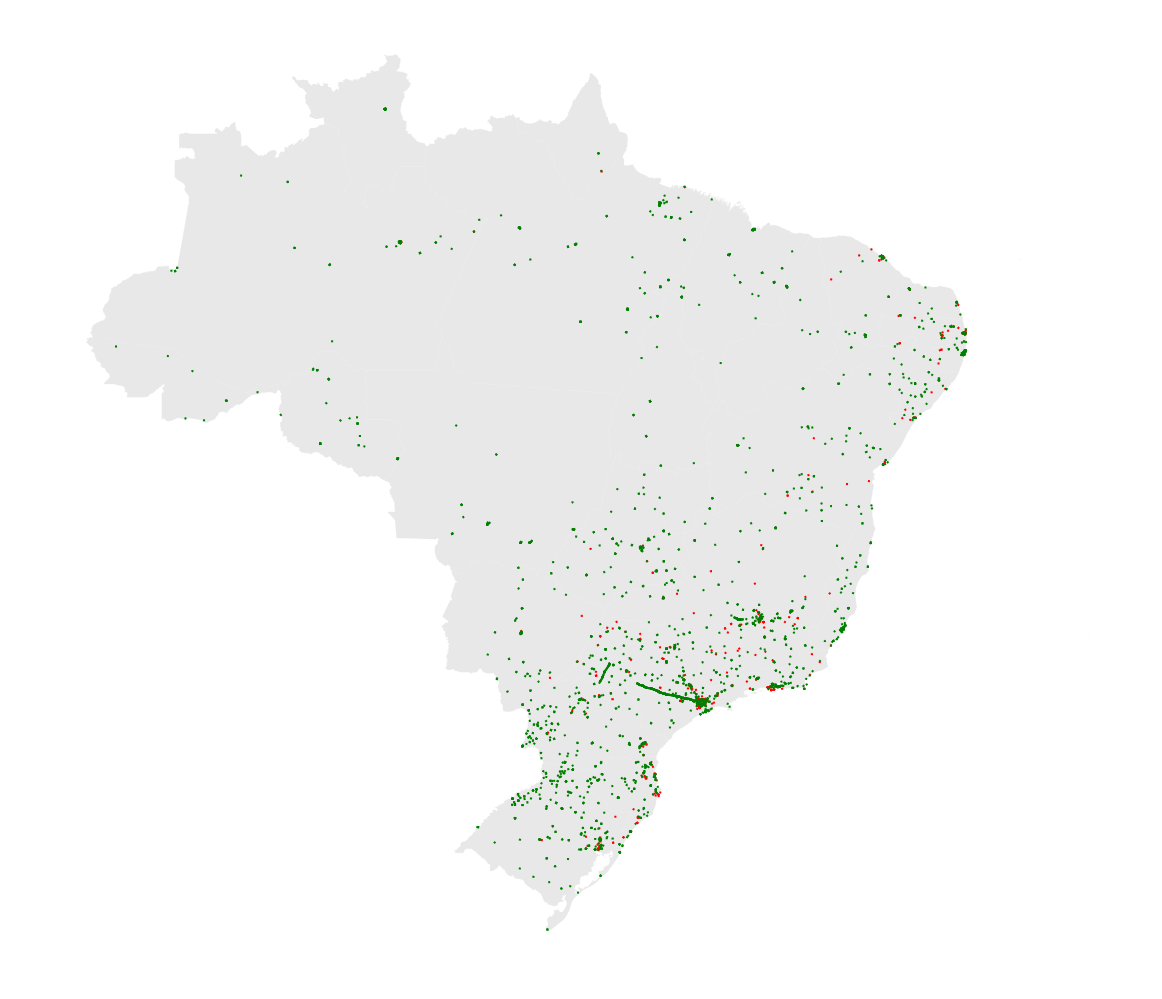

In [53]:
# Entire map
ax = brazil.plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[sjoin['code'] == '1'].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[sjoin['code'] == '2'].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')

plt.savefig("both.png",transparent=True)

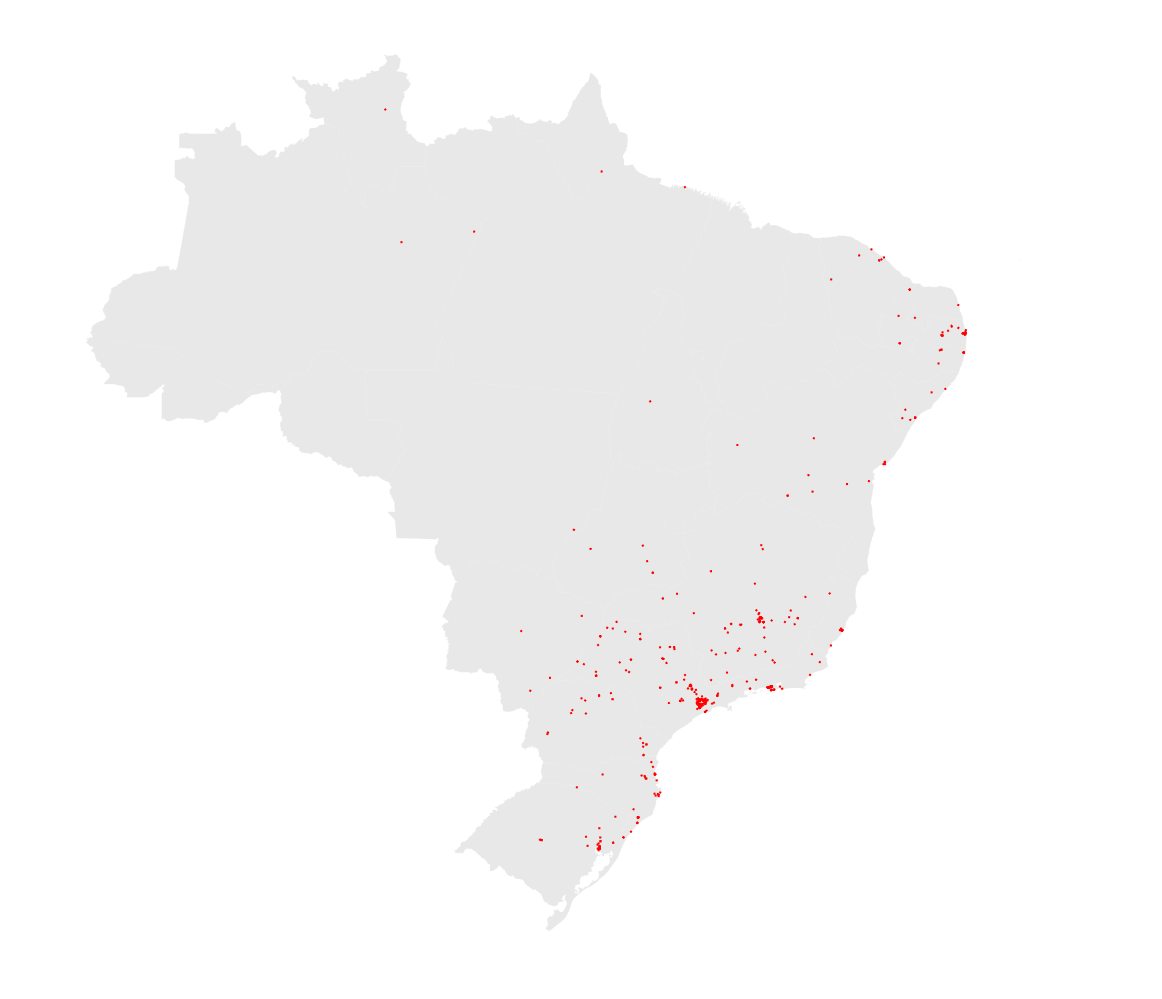

In [51]:
# Victims
ax = brazil.plot(figsize=(20,20),color='lightgrey',linewidth=0)
database[database['code'] == '1'].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
ax.axis('off')

plt.savefig("victim.png", transparent=True)

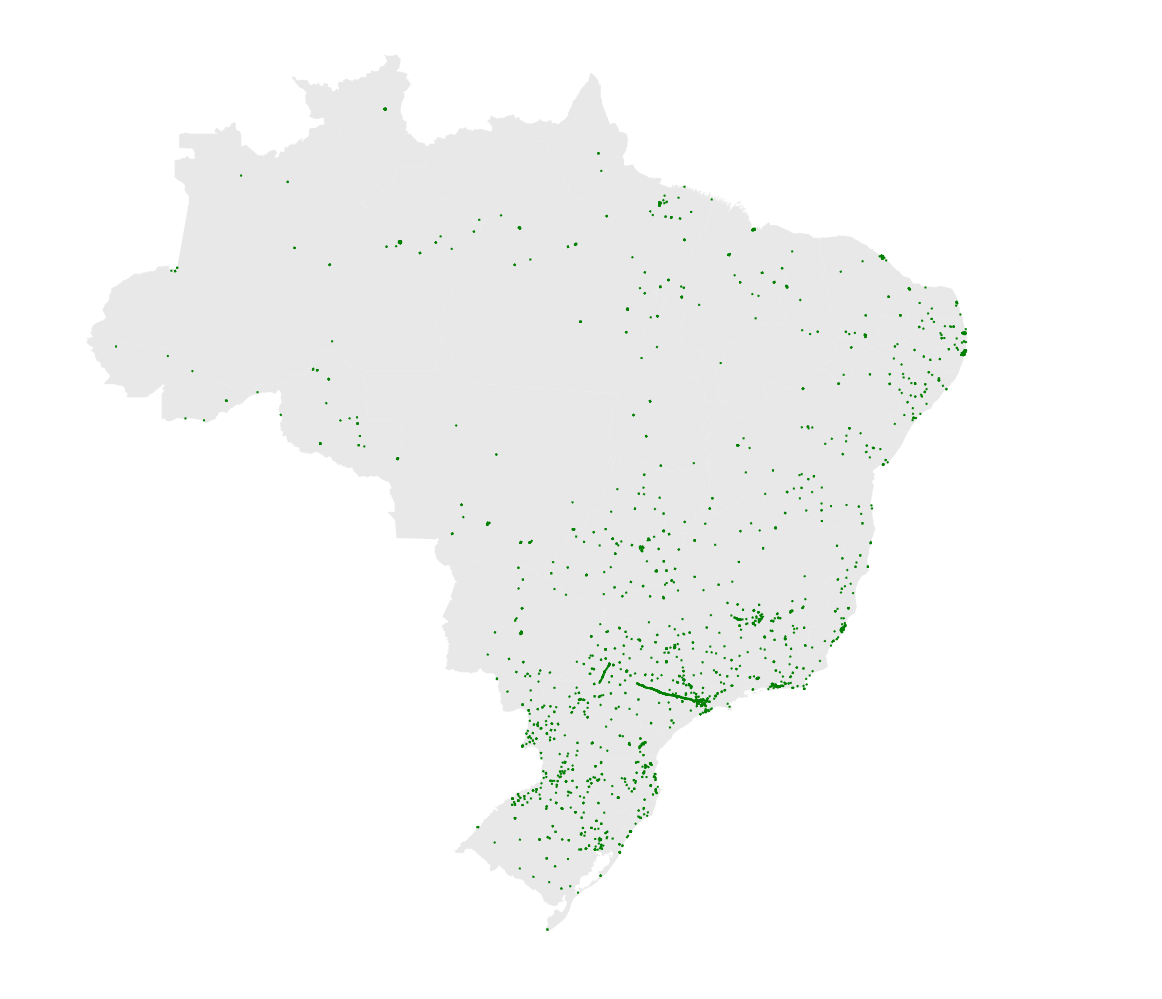

In [52]:
# Criminals
ax = brazil.plot(figsize=(20,20),color='lightgrey',linewidth=0)
database[database['code'] == '2'].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("criminal.png",transparent=True)

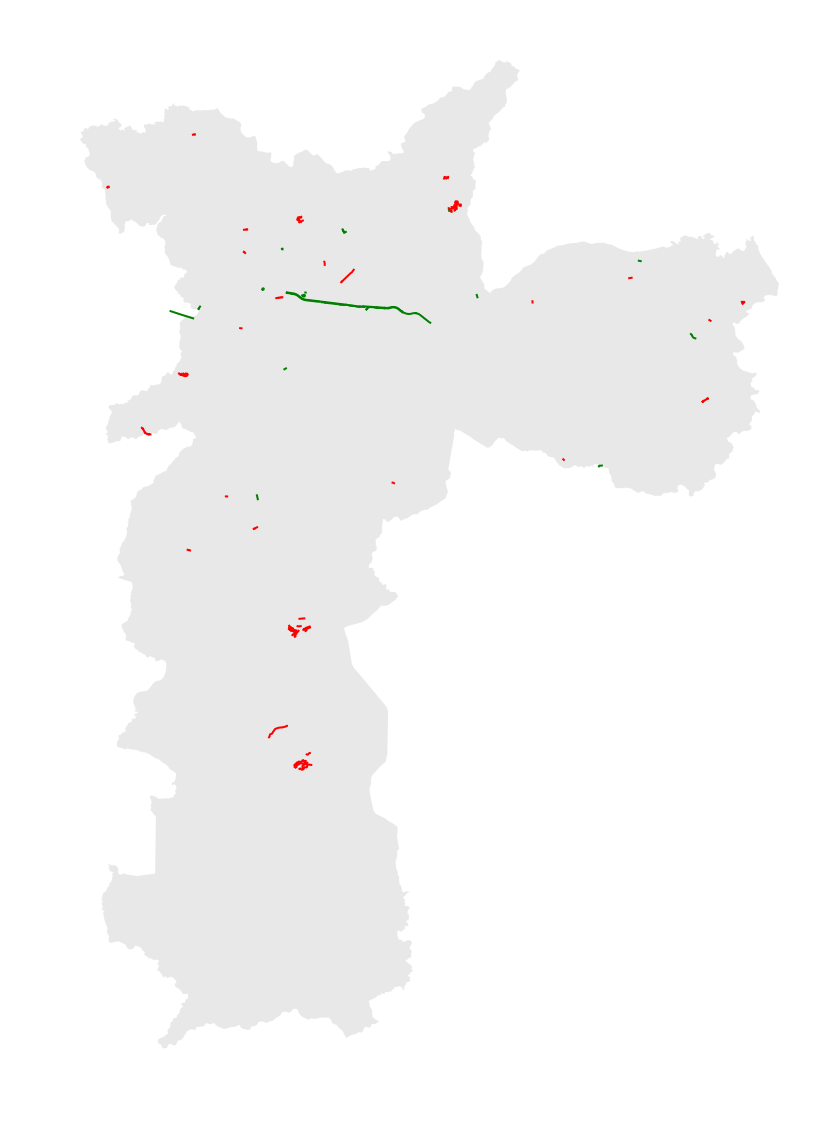

In [41]:
# São Paulo
ax = cities[cities['NM_MUNICIP']=='SÃO PAULO'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'SÃO PAULO') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'SÃO PAULO') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("sp.png",transparent=True)

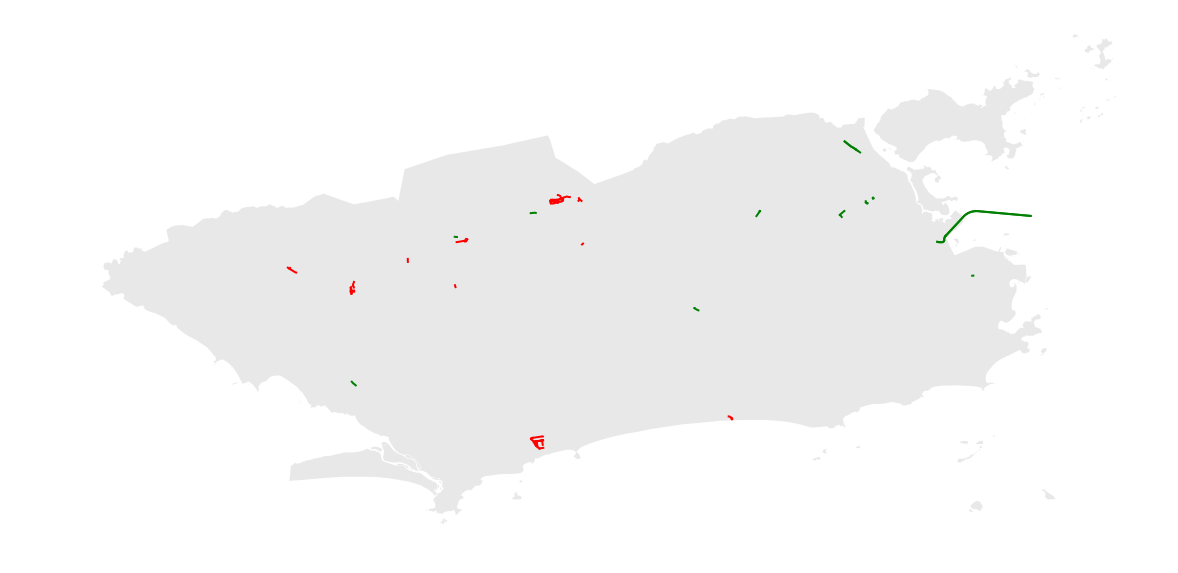

In [42]:
# Rio de Janeiro
ax = cities[cities['NM_MUNICIP']=='RIO DE JANEIRO'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'RIO DE JANEIRO') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'RIO DE JANEIRO') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("rj.pdf")

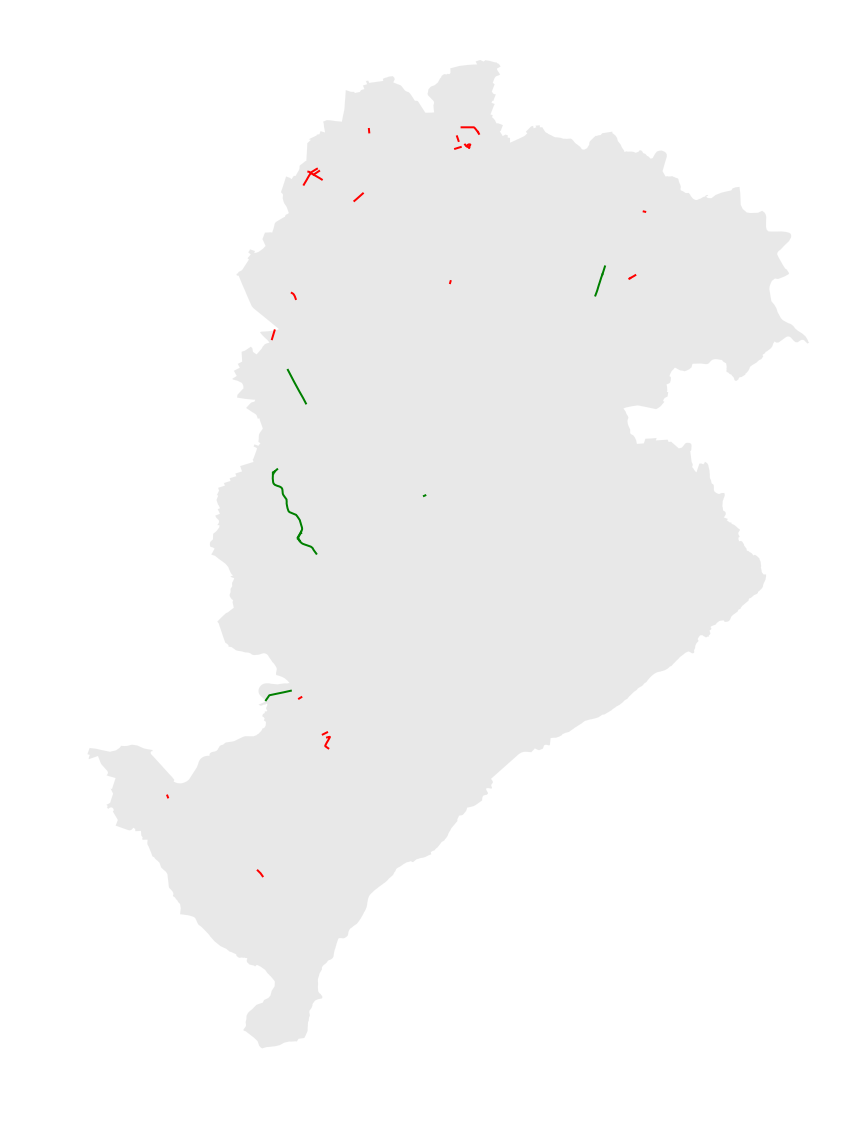

In [43]:
# Belo Horizonte
ax = cities[cities['NM_MUNICIP']=='BELO HORIZONTE'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'BELO HORIZONTE') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'BELO HORIZONTE') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("bh.pdf")

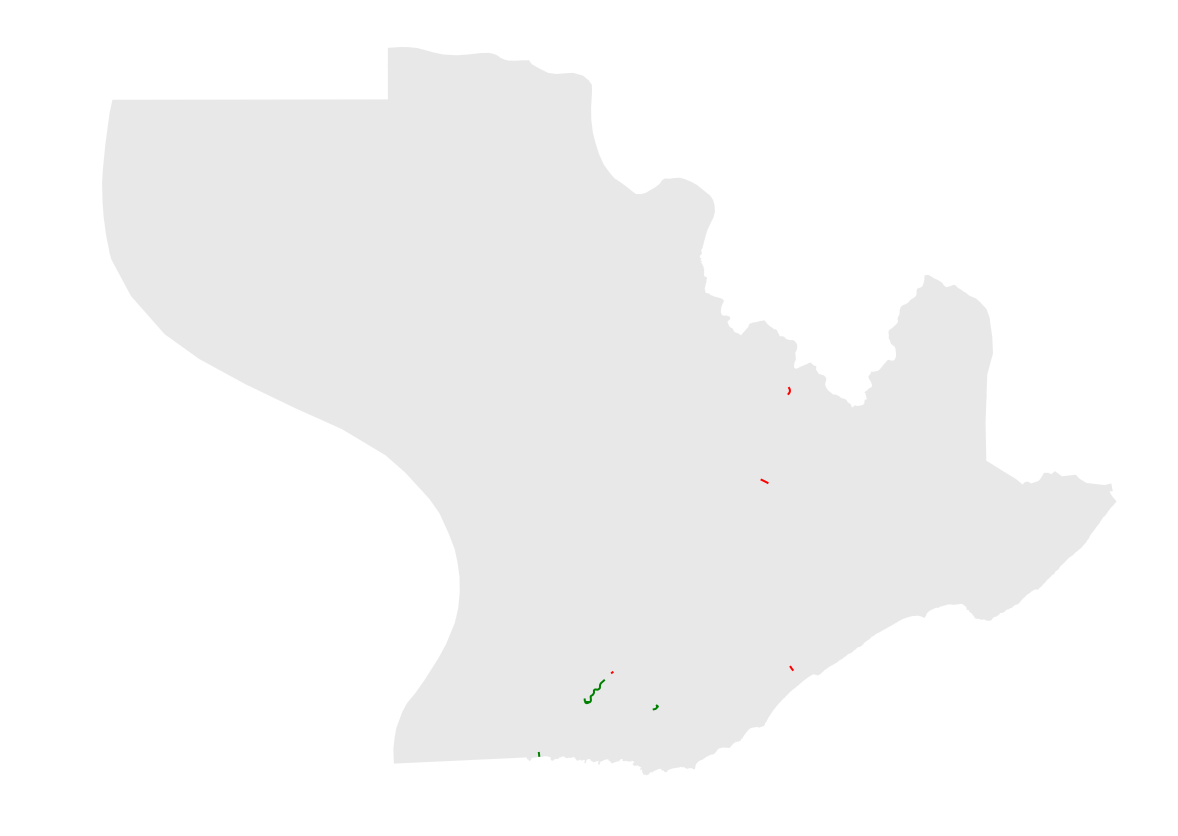

In [44]:
# Salvador
ax = cities[cities['NM_MUNICIP']=='SALVADOR'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'SALVADOR') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'SALVADOR') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("salvador.pdf")

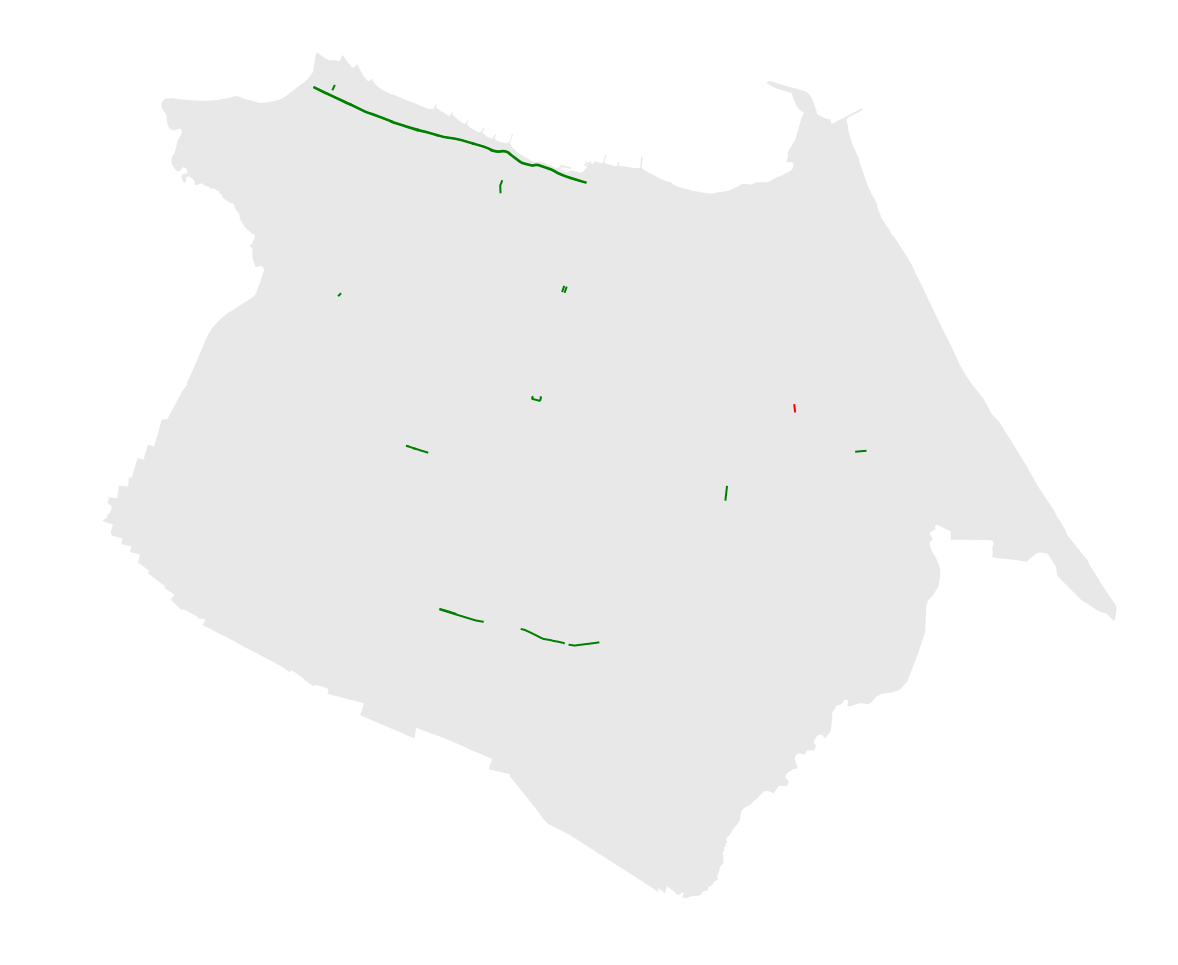

In [45]:
# Fortaleza
ax = cities[cities['NM_MUNICIP']=='FORTALEZA'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'FORTALEZA') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'FORTALEZA') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("fortaleza.pdf")

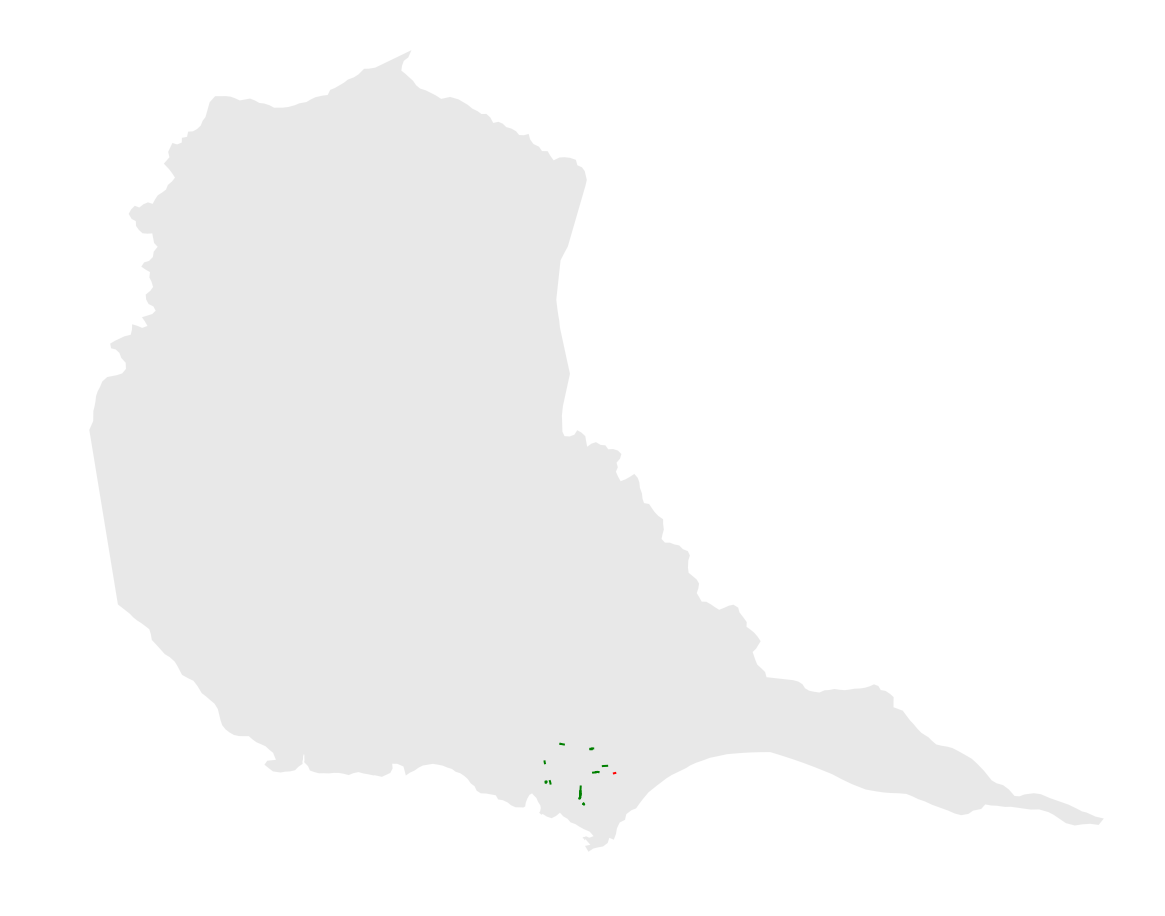

In [46]:
# Manaus
ax = cities[cities['NM_MUNICIP']=='MANAUS'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'MANAUS') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'MANAUS') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("manaus.pdf")

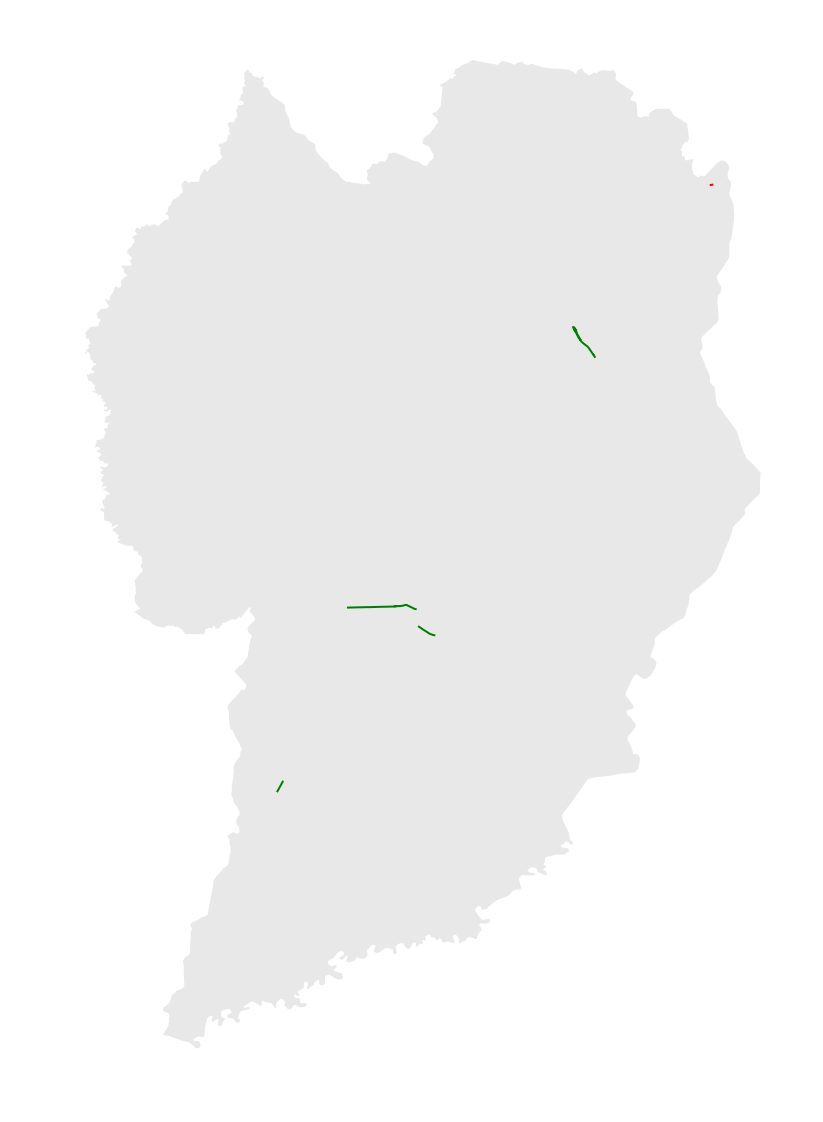

In [47]:
# Curitiba
ax = cities[cities['NM_MUNICIP']=='CURITIBA'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'CURITIBA') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'CURITIBA') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("ctba.pdf")

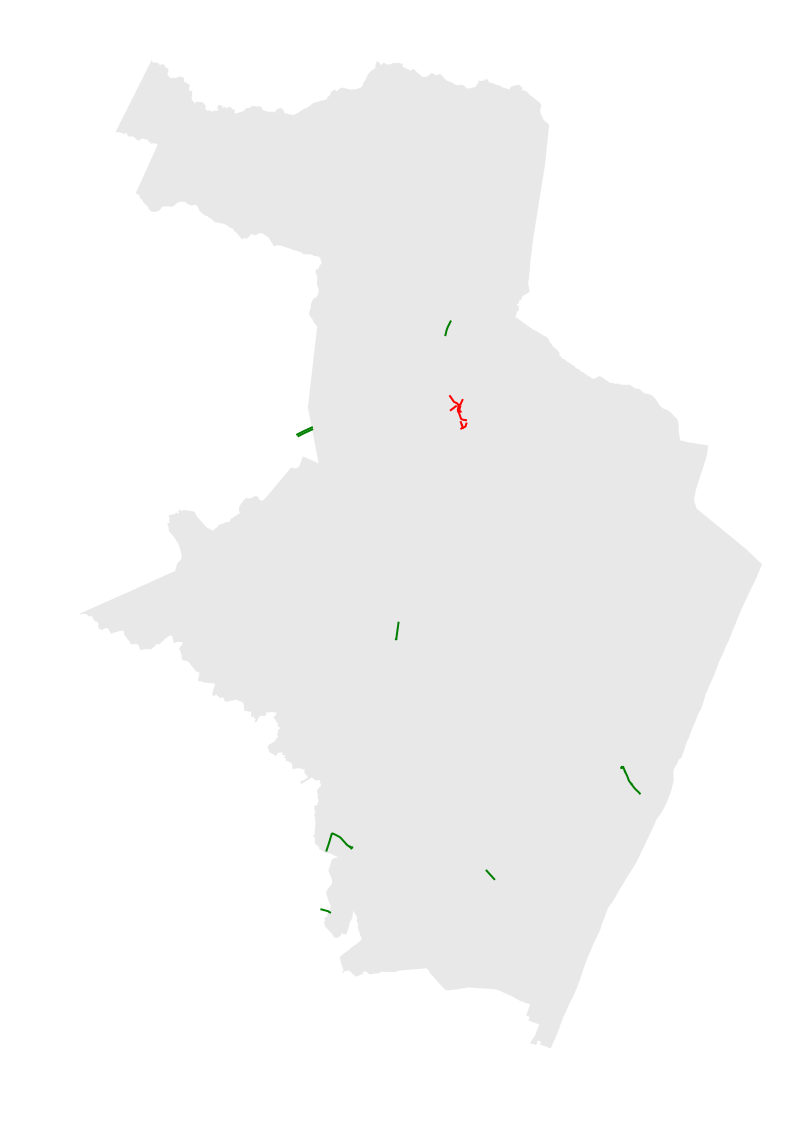

In [48]:
# Recife
ax = cities[cities['NM_MUNICIP']=='RECIFE'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'RECIFE') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'RECIFE') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("recife.pdf")

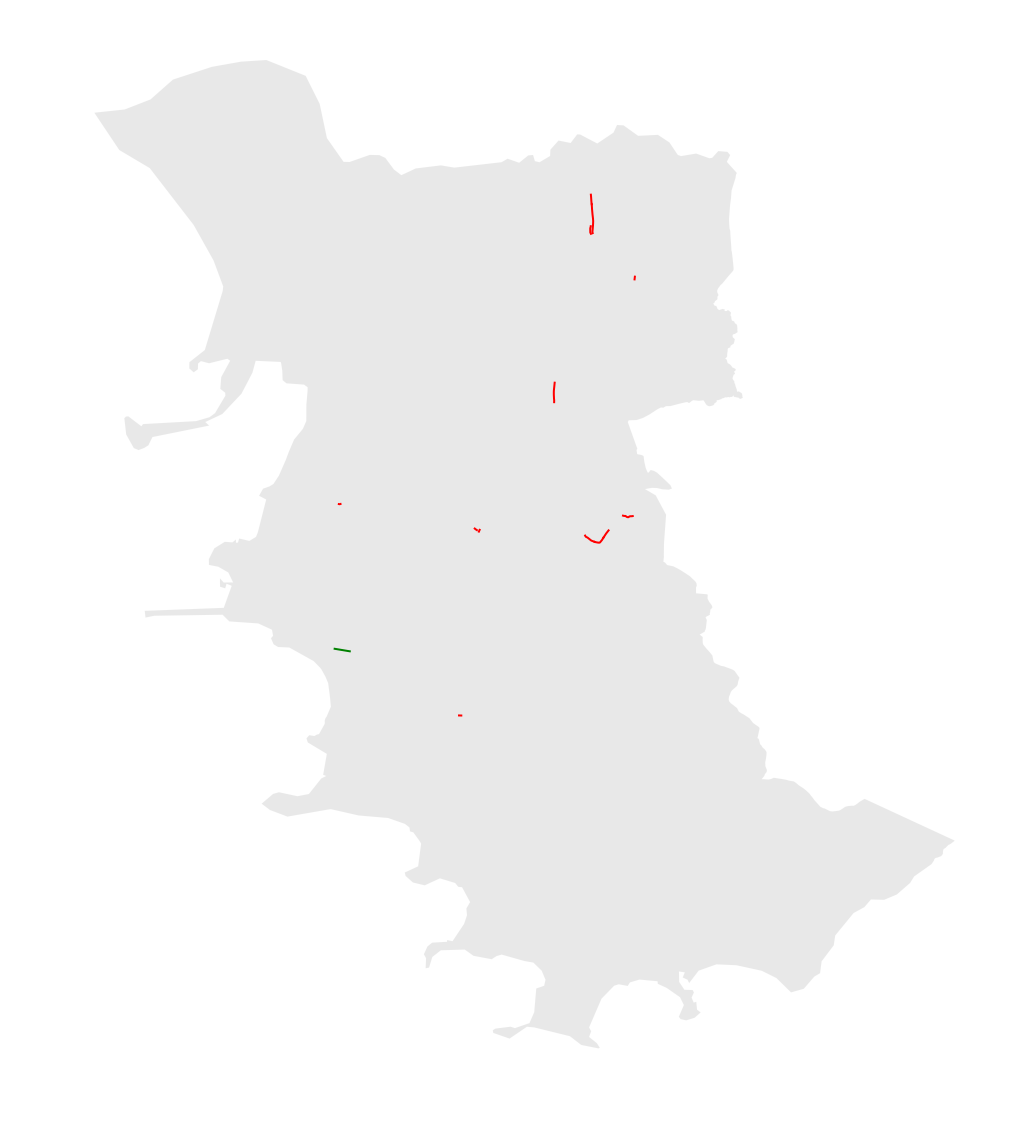

In [49]:
# Porto Alegre
ax = cities[cities['NM_MUNICIP']=='PORTO ALEGRE'].plot(figsize=(20,20),color='lightgrey',linewidth=0)
sjoin[(sjoin['city'] == 'PORTO ALEGRE') & (sjoin['code'] == '1')].plot(figsize=(20,20),color='red',ax=ax,linewidth=2)
sjoin[(sjoin['city'] == 'PORTO ALEGRE') & (sjoin['code'] == '2')].plot(figsize=(20,20),color='green',ax=ax,linewidth=2)
ax.axis('off')
plt.savefig("poa.pdf")